In [5]:
import torch
import torch.optim as optim

In [61]:
class Model:
    def __init__(self, X, t):
        self.X = torch.tensor(X, dtype=torch.float)
        self.t = torch.tensor(t, dtype=torch.float)
        self.theta = torch.zeros(X.shape[1]+1, requires_grad=True).float()
        self.cutpoint_logit = torch.tensor([-1.2], requires_grad=True)
    
    # shifted and scaled sigmoid function
    def sigmoid(self, x, a=0, b=1.):
        return 1 / (1 + (torch.exp(-1 * (x - a) / b)))
    
    
    def pred_value(self, x, theta):
        prod = torch.matmul(x,theta)
        return self.sigmoid(prod)
    
    
    def loss_func(self, params, x, t):

        theta = params[:-1][0]

        cutpoint_logit = params[-1]

        cutpoint = self.sigmoid(self.cutpoint_logit)

        t_disc = self.sigmoid(t, cutpoint, 0.01)

        x1 = torch.cat([x, torch.ones((len(x), 1))], axis=1)

        p_hat = self.pred_value(x1, self.theta)

        n = len(t)
        likelihood = (-1/n) * torch.sum( t_disc * torch.log(p_hat) + (1-t_disc)*torch.log(1-p_hat) )

        prior = -1 * scipy.stats.beta.logpdf(cutpoint.detach().numpy(), 1.5, 1.5)[0]

        print('Likelihood = %.7e | Prior = %.7e' % (likelihood, prior))

        return likelihood + prior
    
    
    def train(self):
        # then optimize
        # https://pytorch.org/docs/stable/optim.html
        optimizer = optim.Adam([self.theta, self.cutpoint_logit], lr=0.001)

        loss_diff = 1000
        loss_curr = 1000
        loss_prev = 0 

        iteration_num = 1

        tolerance = 1e-6

        while loss_diff > tolerance:

            iteration_num += 1
            loss_prev = loss_curr

            optimizer.zero_grad()
            loss_curr = loss = self.loss_func((self.theta, self.cutpoint_logit), self.X, self.t)
            loss.backward()
            optimizer.step()
            loss_diff = torch.norm(loss_curr - loss_prev) / (1 + torch.norm(loss_curr) )


        print(iteration_num)

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp

from scipy.optimize import minimize
import scipy.stats
# shifted and scaled sigmoid function
def test_sigmoid(x, a=0, b=1.):
    return 1 / (1 + (np.exp(-1 * (x - a) / b)))

In [63]:
N = 10000
P = 5

rs = np.random.RandomState(1978)

X = rs.randn(N, P)
w = rs.randn(P)

y_prob = test_sigmoid(X @ w)
y = (rs.rand(N) < y_prob).astype(int)
t = (rs.randn(N) + 5 * y) / 20 + .1

In [64]:
torch.autograd.set_detect_anomaly(True)
m = Model(X, t)

In [65]:
out = m.train()

Likelihood = 6.9314730e-01 | Prior = -7.1429192e-02
Likelihood = 6.9309556e-01 | Prior = -7.1429192e-02
Likelihood = 6.9304413e-01 | Prior = -7.1449120e-02
Likelihood = 6.9299251e-01 | Prior = -7.1471340e-02
Likelihood = 6.9294101e-01 | Prior = -7.1494749e-02
Likelihood = 6.9288957e-01 | Prior = -7.1518920e-02
Likelihood = 6.9283813e-01 | Prior = -7.1543741e-02
Likelihood = 6.9278657e-01 | Prior = -7.1569188e-02
Likelihood = 6.9273514e-01 | Prior = -7.1595105e-02
Likelihood = 6.9268376e-01 | Prior = -7.1621580e-02
Likelihood = 6.9263232e-01 | Prior = -7.1648412e-02
Likelihood = 6.9258094e-01 | Prior = -7.1675734e-02
Likelihood = 6.9252950e-01 | Prior = -7.1703481e-02
Likelihood = 6.9247818e-01 | Prior = -7.1731628e-02
Likelihood = 6.9242686e-01 | Prior = -7.1760175e-02
Likelihood = 6.9237548e-01 | Prior = -7.1789169e-02
Likelihood = 6.9232410e-01 | Prior = -7.1818473e-02
Likelihood = 6.9227284e-01 | Prior = -7.1848109e-02
Likelihood = 6.9222158e-01 | Prior = -7.1878146e-02
Likelihood =

Likelihood = 6.8522471e-01 | Prior = -7.7192174e-02
Likelihood = 6.8517607e-01 | Prior = -7.7230719e-02
Likelihood = 6.8512738e-01 | Prior = -7.7269169e-02
Likelihood = 6.8507874e-01 | Prior = -7.7307546e-02
Likelihood = 6.8503010e-01 | Prior = -7.7345917e-02
Likelihood = 6.8498152e-01 | Prior = -7.7384303e-02
Likelihood = 6.8493295e-01 | Prior = -7.7422617e-02
Likelihood = 6.8488437e-01 | Prior = -7.7460924e-02
Likelihood = 6.8483585e-01 | Prior = -7.7499224e-02
Likelihood = 6.8478739e-01 | Prior = -7.7537474e-02
Likelihood = 6.8473887e-01 | Prior = -7.7575630e-02
Likelihood = 6.8469030e-01 | Prior = -7.7613822e-02
Likelihood = 6.8464184e-01 | Prior = -7.7651943e-02
Likelihood = 6.8459344e-01 | Prior = -7.7690035e-02
Likelihood = 6.8454498e-01 | Prior = -7.7728120e-02
Likelihood = 6.8449658e-01 | Prior = -7.7766133e-02
Likelihood = 6.8444812e-01 | Prior = -7.7804139e-02
Likelihood = 6.8439978e-01 | Prior = -7.7842095e-02
Likelihood = 6.8435138e-01 | Prior = -7.7880023e-02
Likelihood =

Likelihood = 6.7766500e-01 | Prior = -8.2800244e-02
Likelihood = 6.7761916e-01 | Prior = -8.2830820e-02
Likelihood = 6.7757332e-01 | Prior = -8.2861393e-02
Likelihood = 6.7752755e-01 | Prior = -8.2891897e-02
Likelihood = 6.7748177e-01 | Prior = -8.2922311e-02
Likelihood = 6.7743599e-01 | Prior = -8.2952657e-02
Likelihood = 6.7739022e-01 | Prior = -8.2982934e-02
Likelihood = 6.7734450e-01 | Prior = -8.3013122e-02
Likelihood = 6.7729878e-01 | Prior = -8.3043284e-02
Likelihood = 6.7725313e-01 | Prior = -8.3073357e-02
Likelihood = 6.7720747e-01 | Prior = -8.3103383e-02
Likelihood = 6.7716175e-01 | Prior = -8.3133319e-02
Likelihood = 6.7711610e-01 | Prior = -8.3163166e-02
Likelihood = 6.7707038e-01 | Prior = -8.3192966e-02
Likelihood = 6.7702478e-01 | Prior = -8.3222656e-02
Likelihood = 6.7697924e-01 | Prior = -8.3252320e-02
Likelihood = 6.7693365e-01 | Prior = -8.3281916e-02
Likelihood = 6.7688805e-01 | Prior = -8.3311422e-02
Likelihood = 6.7684257e-01 | Prior = -8.3340840e-02
Likelihood =

Likelihood = 6.7054242e-01 | Prior = -8.6614677e-02
Likelihood = 6.7049927e-01 | Prior = -8.6629840e-02
Likelihood = 6.7045605e-01 | Prior = -8.6644918e-02
Likelihood = 6.7041290e-01 | Prior = -8.6659765e-02
Likelihood = 6.7036963e-01 | Prior = -8.6674527e-02
Likelihood = 6.7032647e-01 | Prior = -8.6689140e-02
Likelihood = 6.7028326e-01 | Prior = -8.6703669e-02
Likelihood = 6.7024016e-01 | Prior = -8.6717967e-02
Likelihood = 6.7019707e-01 | Prior = -8.6732179e-02
Likelihood = 6.7015392e-01 | Prior = -8.6746244e-02
Likelihood = 6.7011082e-01 | Prior = -8.6760182e-02
Likelihood = 6.7006785e-01 | Prior = -8.6773973e-02
Likelihood = 6.7002481e-01 | Prior = -8.6787637e-02
Likelihood = 6.6998166e-01 | Prior = -8.6801111e-02
Likelihood = 6.6993868e-01 | Prior = -8.6814480e-02
Likelihood = 6.6989571e-01 | Prior = -8.6827701e-02
Likelihood = 6.6985261e-01 | Prior = -8.6840754e-02
Likelihood = 6.6980970e-01 | Prior = -8.6853680e-02
Likelihood = 6.6976660e-01 | Prior = -8.6866438e-02
Likelihood =

Likelihood = 6.6388863e-01 | Prior = -8.6909881e-02
Likelihood = 6.6384757e-01 | Prior = -8.6895973e-02
Likelihood = 6.6380650e-01 | Prior = -8.6881835e-02
Likelihood = 6.6376537e-01 | Prior = -8.6867465e-02
Likelihood = 6.6372430e-01 | Prior = -8.6852926e-02
Likelihood = 6.6368330e-01 | Prior = -8.6838114e-02
Likelihood = 6.6364229e-01 | Prior = -8.6823112e-02
Likelihood = 6.6360128e-01 | Prior = -8.6807921e-02
Likelihood = 6.6356021e-01 | Prior = -8.6792436e-02
Likelihood = 6.6351920e-01 | Prior = -8.6776802e-02
Likelihood = 6.6347831e-01 | Prior = -8.6760937e-02
Likelihood = 6.6343731e-01 | Prior = -8.6744882e-02
Likelihood = 6.6339630e-01 | Prior = -8.6728574e-02
Likelihood = 6.6335547e-01 | Prior = -8.6712118e-02
Likelihood = 6.6331440e-01 | Prior = -8.6695430e-02
Likelihood = 6.6327351e-01 | Prior = -8.6678489e-02
Likelihood = 6.6323262e-01 | Prior = -8.6661338e-02
Likelihood = 6.6319168e-01 | Prior = -8.6643975e-02
Likelihood = 6.6315079e-01 | Prior = -8.6626464e-02
Likelihood =

Likelihood = 6.5744817e-01 | Prior = -8.2427613e-02
Likelihood = 6.5740865e-01 | Prior = -8.2390154e-02
Likelihood = 6.5736926e-01 | Prior = -8.2352581e-02
Likelihood = 6.5732980e-01 | Prior = -8.2315002e-02
Likelihood = 6.5729040e-01 | Prior = -8.2277330e-02
Likelihood = 6.5725106e-01 | Prior = -8.2239652e-02
Likelihood = 6.5721154e-01 | Prior = -8.2201903e-02
Likelihood = 6.5717220e-01 | Prior = -8.2164126e-02
805


In [66]:
m.sigmoid(m.cutpoint_logit)

tensor([0.2387], grad_fn=<MulBackward0>)

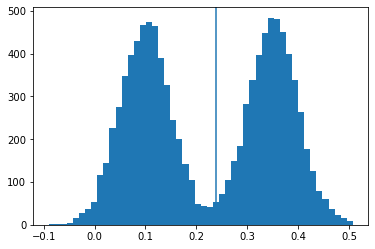

In [67]:
plt.hist(t, bins=50)
plt.axvline(m.sigmoid(m.cutpoint_logit))
plt.show()